In [3]:
import seaborn as sns
import pandas as pd
df= sns.load_dataset("tips")

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.info()  # understanding the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df.describe() #stats the summ

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
# Relationship check before using any model
# Before using the any model , we must confirm relationship .. ?

In [7]:
import matplotlib.pyplot as plt


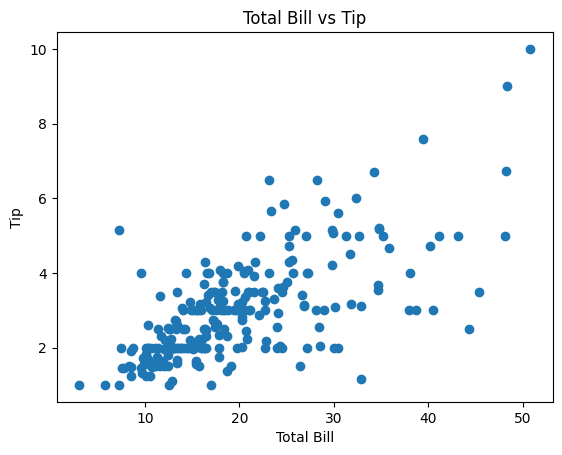

In [8]:
plt.scatter(df['total_bill'],df['tip'])
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs Tip")
plt.show()

In [ ]:
""" Observations
1. As the bill incereases tip increases
2. Relationship = Straight line (We can use linear regression) """

In [ ]:
# 4. Feature and  Target seperation

In [12]:
x = df[["total_bill"]] # feature input 2d only(imp)
y = df["tip"] #feature output 1d

In [ ]:
# 5. Train test split
# --> A model must perform well on the unseen data

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
"""   x_train ---> training on the x train
      x_test ---> testing on the x train
      testing ---> 20%
      training ---> 80%
      random_state ---> takes the 42 data points from the remaining 80% of the data"""

In [ ]:
# Feature Standardization
'''
  1. Compare then co-effcients fairly
  2. Avoid the dominance of the large values
  3. Prepare the Ridge/Lasso
'''

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # fit - transofrm --> calculation of  Standard deviation and the mean
x_test_scaled = scaler.transform(x_test)  # Transform --> prevent from the data leakage

In [ ]:
'''
  Important:
    1. Fit only on the training data
    2. Prevents from the data leakage
'''

In [ ]:
# 7. Train Linear Regression model

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [22]:
print("Co - efficient (m): ", model.coef_[0])
print("Intercept(c):", model.intercept_)
y_pred  = model.predict(x_test_scaled)



Co - efficient (m):  0.9357171400271824
Intercept(c): 3.0877948717948724


In [ ]:
#8. Model Evalution

In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2 Score", r2)

R2 Score 0.5449381659234664


In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
import numpy as np
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("MSE :", mse)
print("RMSE :",rmse)

MSE : 0.5688142529229537
RMSE : 0.7541977545199626


In [ ]:
#9. Visulaize the Best fit line

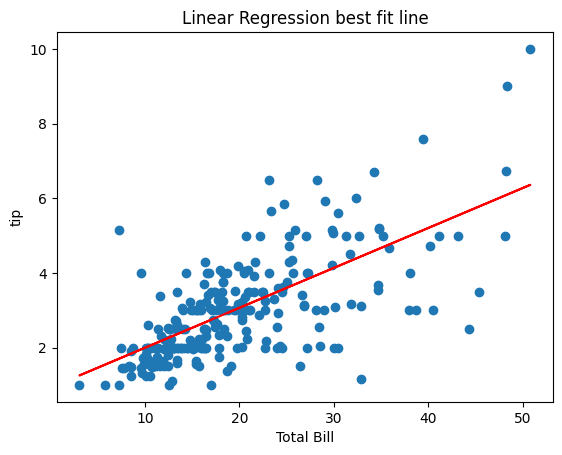

In [19]:
plt.scatter(x,y)
plt.plot(x,model.predict(scaler.transform(x)),color = "red")
plt.xlabel("Total Bill")
plt.ylabel("tip")
plt.title("Linear Regression best fit line")
plt.show()

In [ ]:
# 10.Input - output Real time

In [25]:
bill_amount = float(input("Enter the bill amount : "))
bill_scaled = scaler.transform([[bill_amount]])
predict_tip = model.predict(bill_scaled)

Enter the bill amount : 50


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:
print(f"Predicted Tip : ${predict_tip[0]: .2f}")

Predicted Tip : $ 6.27
